In [34]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from tensorflow import math
from keras.utils.vis_utils import plot_model

# Test if using Tensorflow GPU
if(tf.config.list_physical_devices('GPU')):
    print('Yes')

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
data.head()

<IPython.core.display.Javascript object>

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [36]:
data.isnull().sum() # No null values

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [37]:
# Tensorflow only cares about numeric data
data_numeric = data.copy()
data_numeric.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [38]:
cols = ['first_name', 'last_name', 'team', 'pos']
data_numeric.drop(cols, axis=1, inplace=True)
data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [39]:
# Convert currency to float
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [40]:
data_numeric['salary'] = data_numeric['salary'].apply(clean_currency).astype(float)
data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904


In [41]:
data_numeric.shape

(289, 27)

In [42]:
data_numeric.describe()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000
mean,8.972877e+06,25.768166,56.619377,30.415225,1373.657439,237.546713,514.283737,0.458730,74.276817,208.335640,0.329626,163.269896,305.948097,0.527087,0.529311,97.934256,125.660900,0.758394,55.598616,194.788927,250.387543,140.802768,44.529412,26.709343,75.211073,110.83045,647.304498
std,1.008679e+07,4.378557,18.081042,26.947104,698.833132,164.543135,347.674340,0.072096,63.139612,166.382283,0.093922,132.330958,242.085400,0.077674,0.061117,95.427324,117.650093,0.109234,49.172226,138.198229,177.846596,126.966637,28.249385,24.822116,58.024125,58.04586,455.553247
min,5.318000e+03,19.000000,9.000000,0.000000,35.000000,3.000000,13.000000,0.231000,0.000000,1.000000,0.000000,2.000000,9.000000,0.222000,0.269000,2.000000,4.000000,0.333000,2.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,4.00000,12.000000
25%,2.033160e+06,22.000000,47.000000,5.000000,799.000000,110.000000,247.000000,0.411000,21.000000,70.000000,0.304000,65.000000,127.000000,0.479000,0.493000,35.000000,49.000000,0.700000,22.000000,97.000000,125.000000,51.000000,25.000000,10.000000,38.000000,68.00000,299.000000
50%,4.259259e+06,25.000000,62.000000,21.000000,1406.000000,212.000000,465.000000,0.451000,57.000000,169.000000,0.342000,129.000000,236.000000,0.529000,0.533000,72.000000,93.000000,0.770000,39.000000,174.000000,217.000000,99.000000,41.000000,19.000000,57.000000,106.00000,588.000000
75%,1.242000e+07,29.000000,70.000000,57.000000,1931.000000,324.000000,723.000000,0.496000,115.000000,320.000000,0.377000,218.000000,411.000000,0.573000,0.566000,130.000000,167.000000,0.838000,73.000000,252.000000,334.000000,188.000000,62.000000,35.000000,100.000000,155.00000,892.000000
max,4.578097e+07,38.000000,82.000000,80.000000,2743.000000,774.000000,1564.000000,0.693000,285.000000,750.000000,1.000000,724.000000,1393.000000,0.754000,0.693000,654.000000,803.000000,1.000000,279.000000,813.000000,1019.000000,702.000000,138.000000,177.000000,292.000000,286.00000,2118.000000


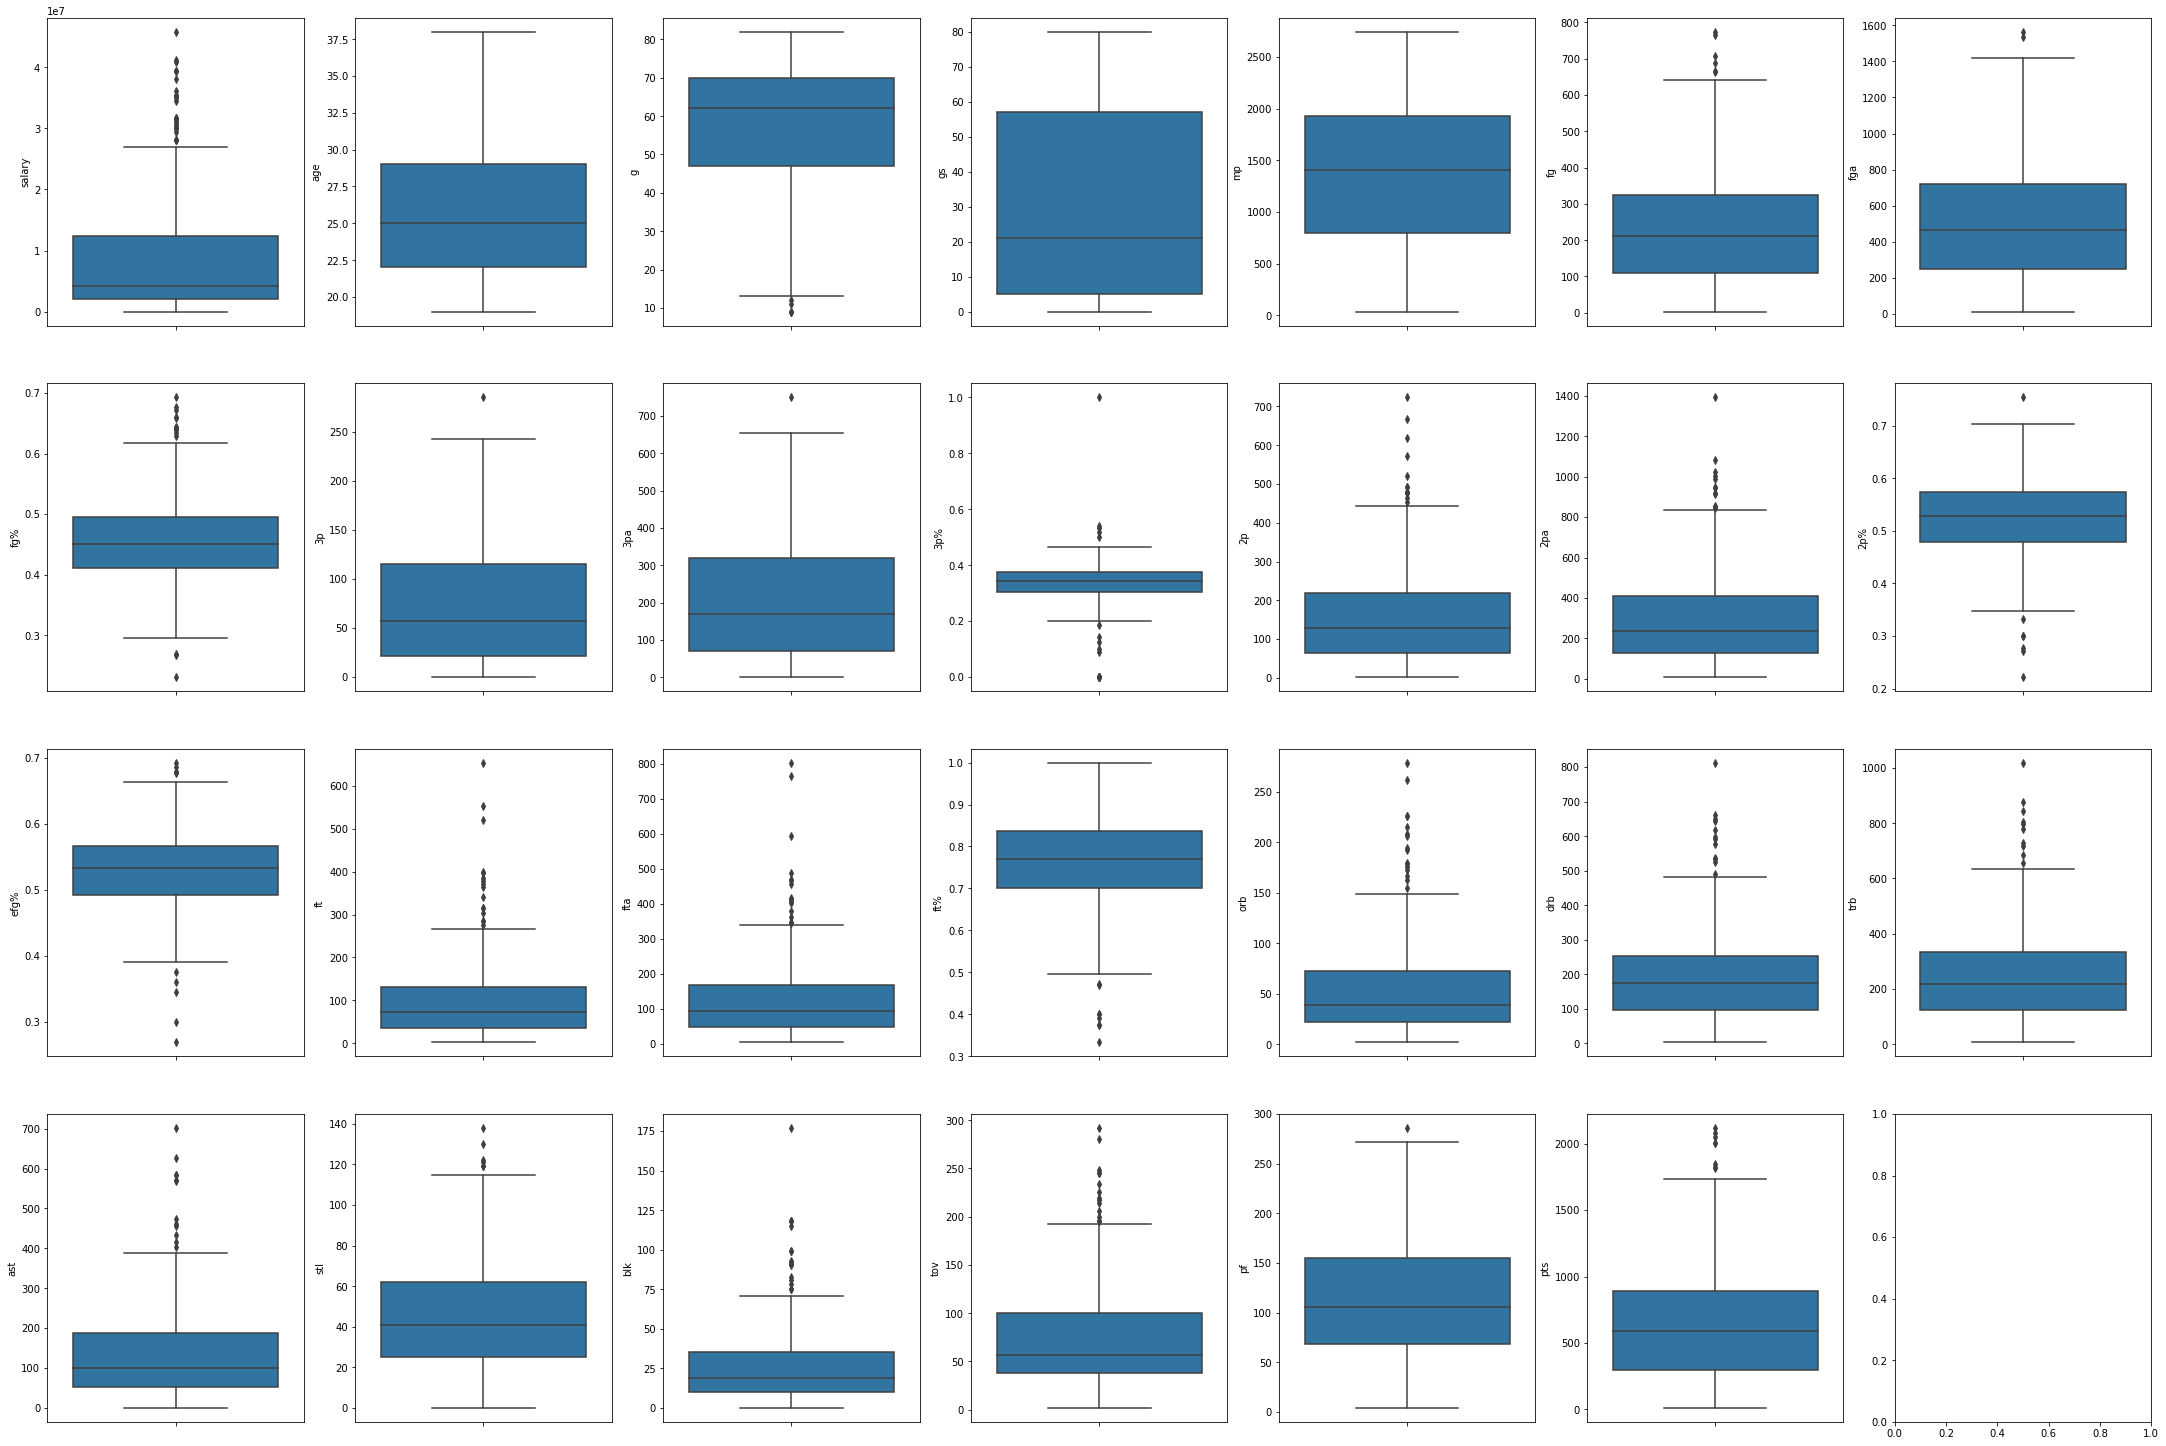

In [43]:
fig, axs = plt.subplots(4, 7, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in data_numeric.items():
    sns.boxplot(y=k, data=data_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

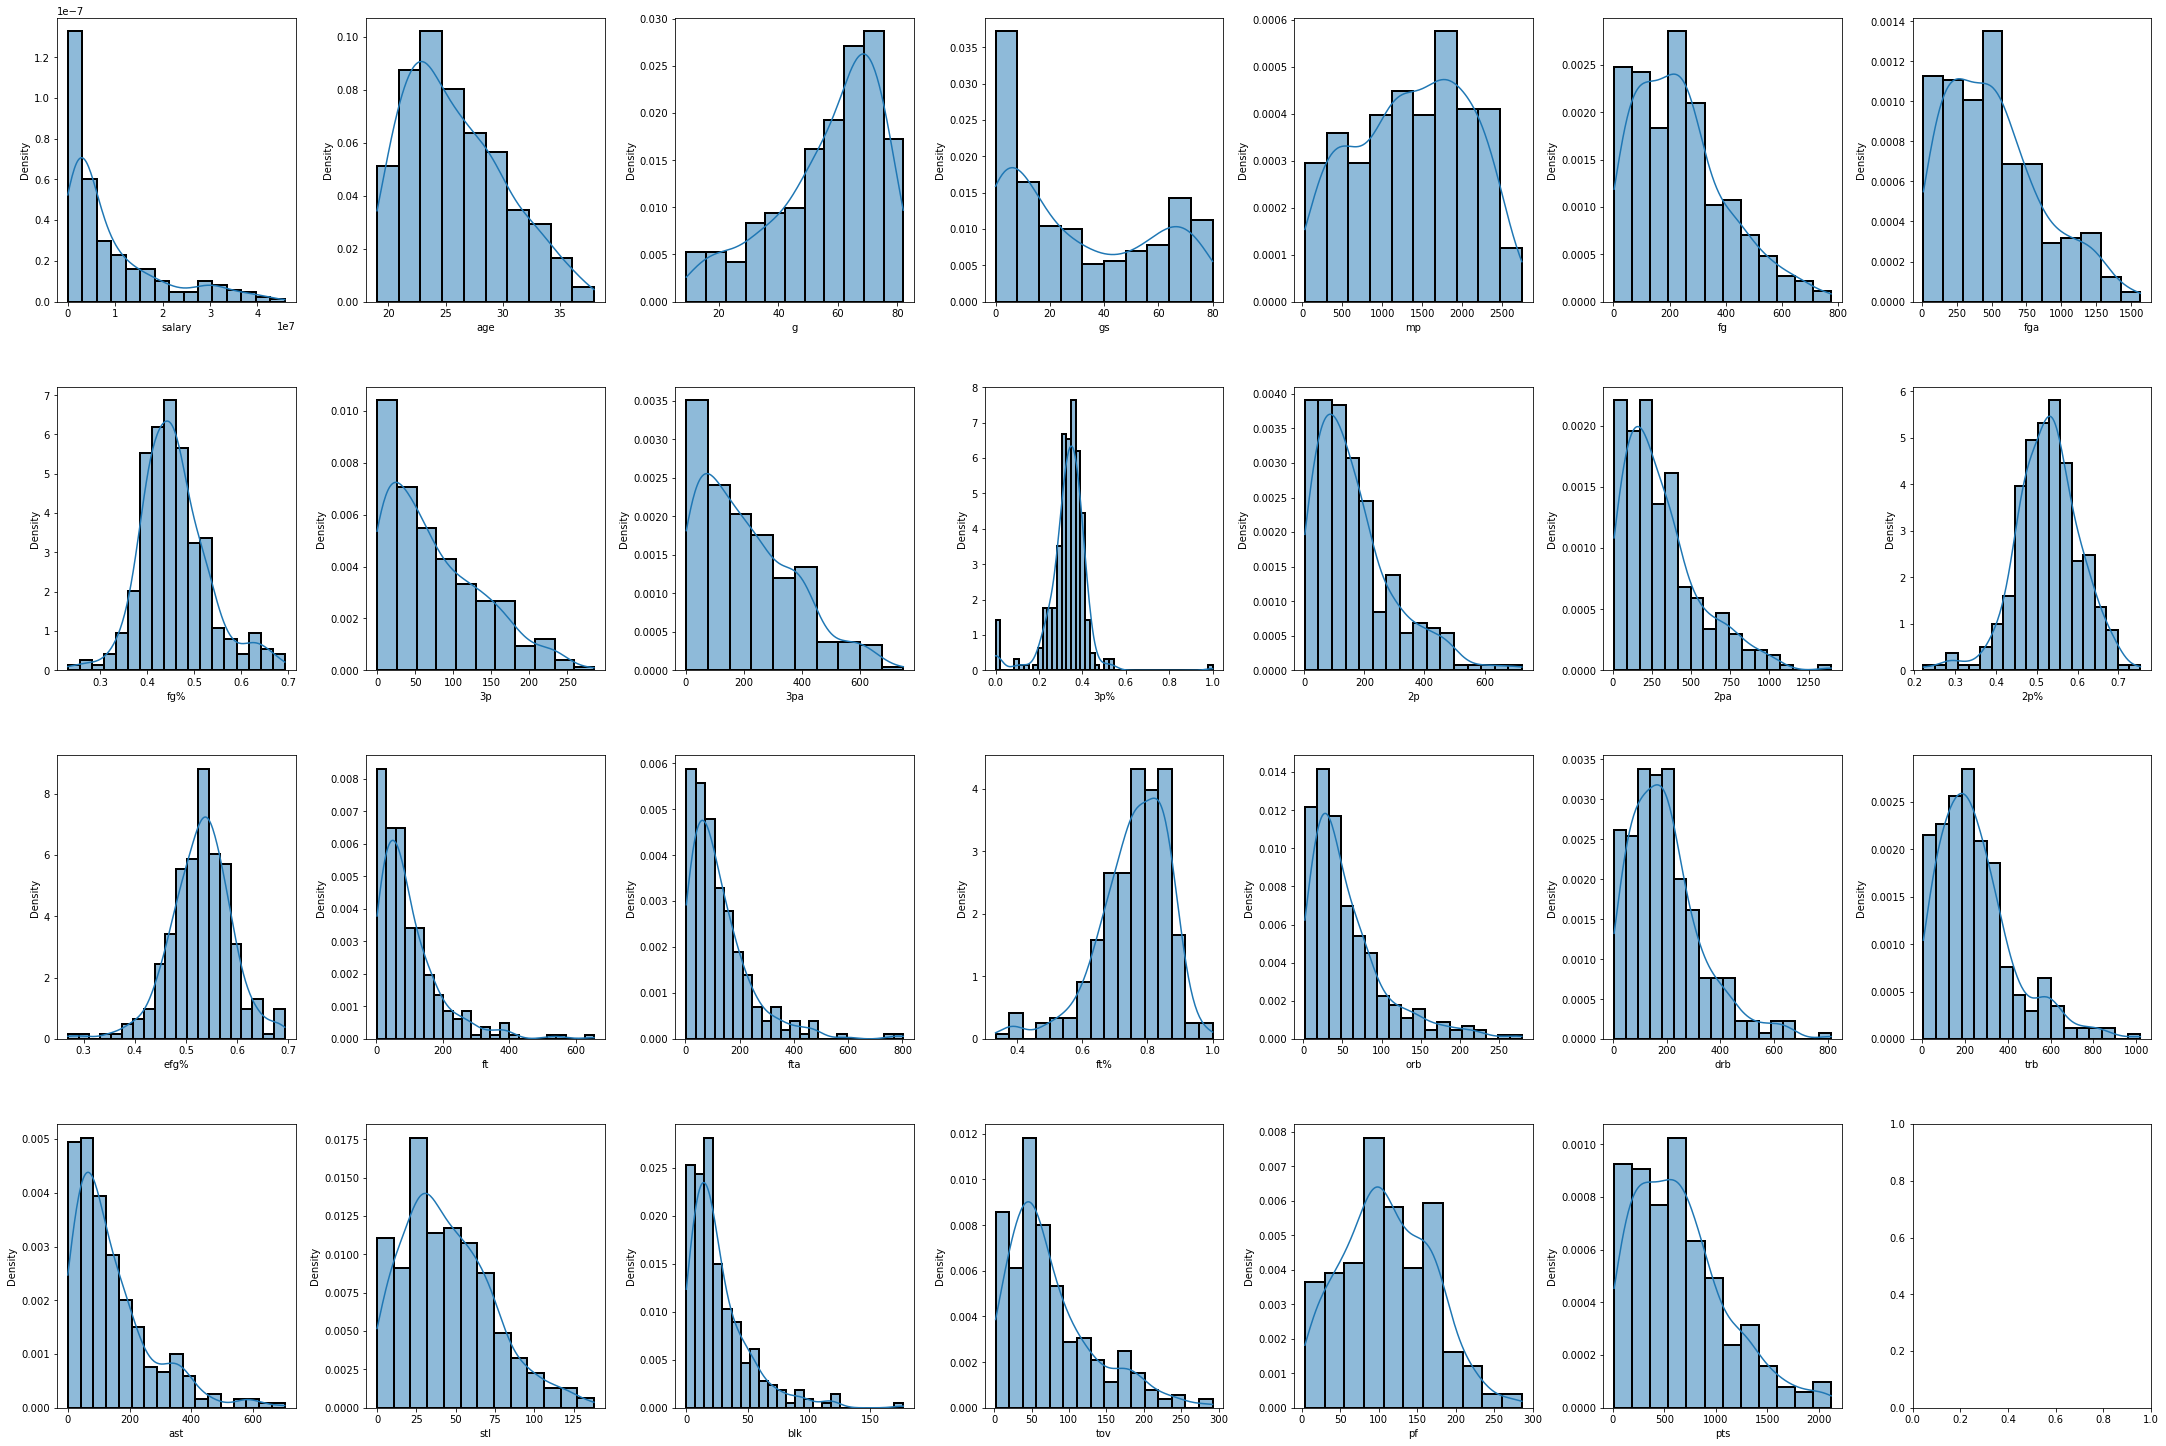

In [44]:
fig, axs = plt.subplots(4, 7, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in data_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat='density', linewidth=2)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

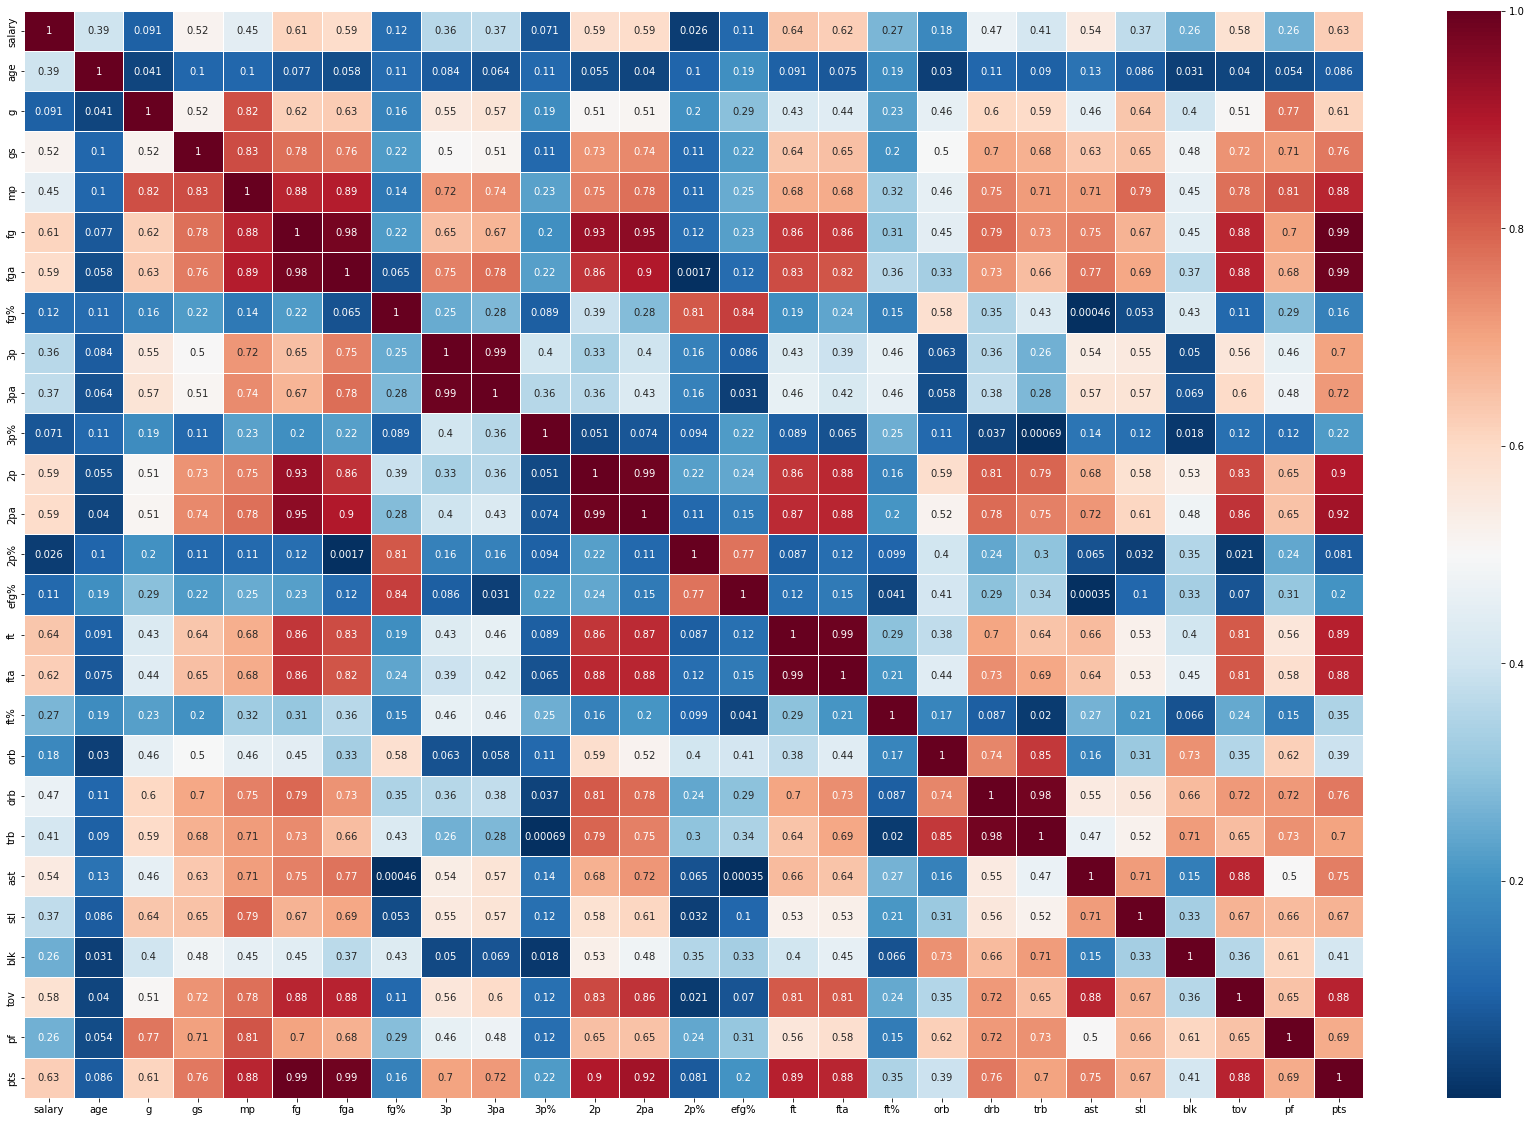

In [45]:
plt.figure(figsize=(30, 20))
sns.heatmap(data_numeric.corr().abs(), annot=True, cmap='RdBu_r', linewidths=0.5)

In [46]:
# Chack outliers
for k, v in data_numeric.items():
    q1 = np.percentile(v, 25)
    q3 = np.percentile(v, 75)
    iqr = q3 - q1
    low_bound = q1 - (iqr * 1.5)
    high_bound = q3 + (iqr * 1.5)
    per = np.shape(v[(v > low_bound) & (v < high_bound)])[0]  * 10/ np.shape(v)[0]
    print("{} Outliers = {}%".format(k, per))

salary Outliers = 9.03114186851211%
age Outliers = 10.0%
g Outliers = 9.826989619377162%
gs Outliers = 10.0%
mp Outliers = 10.0%
fg Outliers = 9.792387543252595%
fga Outliers = 9.930795847750865%
fg% Outliers = 9.515570934256056%
3p Outliers = 9.965397923875432%
3pa Outliers = 9.965397923875432%
3p% Outliers = 9.342560553633218%
2p Outliers = 9.550173010380623%
2pa Outliers = 9.584775086505191%
2p% Outliers = 9.757785467128027%
efg% Outliers = 9.619377162629759%
ft Outliers = 9.44636678200692%
fta Outliers = 9.44636678200692%
ft% Outliers = 9.72318339100346%
orb Outliers = 9.44636678200692%
drb Outliers = 9.584775086505191%
trb Outliers = 9.653979238754324%
ast Outliers = 9.584775086505191%
stl Outliers = 9.792387543252595%
blk Outliers = 9.44636678200692%
tov Outliers = 9.515570934256056%
pf Outliers = 9.965397923875432%
pts Outliers = 9.72318339100346%


In [47]:
# create constant Tensor
scalar = tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [48]:
# Create vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [49]:
# Create matrix
matrix = tf.constant([[10, 10], [10, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [10, 10]])>

In [50]:
# create tensor 
tensor = tf.constant([[[10, 10], [10, 10]], [[10, 10], [10, 10]]])
tensor

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[10, 10],
        [10, 10]],

       [[10, 10],
        [10, 10]]])>

In [51]:
# create a tensor that can be changed
v_tensor = tf.Variable(tf.random.uniform([2, 2]))
v_tensor

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.646611  , 0.27133298],
       [0.92906356, 0.81878054]], dtype=float32)>

In [52]:
random_tensor = tf.random.Generator.from_seed(42)
random_tensor = random_tensor.normal(shape=(3,2), mean=0, stddev=1)
random_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [53]:
# Turn numpy array into tensor
np_array = np.arange(1, 25, dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [54]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [55]:
# Matrix multiplication
ice_sales = tf.constant([[23, 45, 67, 22, 45], [32, 12, 44, 78, 33], [9, 12, 31, 45, 11], [55, 34, 43, 21, 23]])
ice_sales
ice_price = tf.constant([[3, 2, 4, 4]])
ice_price
tf.matmul(ice_price, ice_sales)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[389, 343, 585, 486, 337]])>

In [56]:
# Normalization adn OneHotEncoding -> Normalize data to a common scale
data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,0.359,209,447,0.468,0.486,78,131,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,0.000,406,723,0.562,0.557,256,340,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,0.304,238,412,0.578,0.566,89,102,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,0.409,96,180,0.533,0.588,64,74,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,0.100,368,535,0.688,0.678,165,233,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,0.300,16,28,0.571,0.485,15,18,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,0.390,309,542,0.570,0.576,207,332,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,0.379,78,153,0.510,0.535,54,63,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,0.091,129,236,0.547,0.528,38,61,0.623,85,209,294,49,17,20,41,84,299


In [57]:
col_trans = make_column_transformer(
    (MinMaxScaler(), ['age', 'pts']),
    (OneHotEncoder(handle_unknown='ignore'), ['pos', 'team'])
)

In [58]:
# Deparate Features and Labels
X = data.drop('salary', axis=1)
y = data['salary']

In [59]:
# Separate in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape

((231, 30), (58, 30))

In [61]:
# Trandform train and test data
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

NameError: name 'ct' is not defined